In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df1 =pd.read_csv("C:/Users/venka/Desktop/Bengaluru_House_Data.csv")
df1.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [5]:
df1.shape

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2 =df1.drop(['area_type','availability','balcony','society'],axis='columns')
df2.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3=df2.dropna()

In [10]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))

<ipython-input-12-c379116b8702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']=df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [14]:
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3.bhk>15]

location        size total_sqft  bath  price  bhk
1718       2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
3379                  1Hanuman Nagar      19 BHK       2000  16.0  490.0   19
3609   Koramangala Industrial Layout      16 BHK      10000  16.0  550.0   16
4684                     Munnekollal  43 Bedroom       2400  40.0  660.0   43
11559                  1Kasavanhalli  18 Bedroom       1200  18.0  200.0   18

In [16]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [19]:
def convert_total_sqft_to_num(x):
    values=x.split('-')
    if len(values) == 2:
        return (float(values[0])+float(values[1]))/2
    try:
        return float(x)
    except:
        return None

In [20]:
convert_total_sqft_to_num('2345')

2345.0

In [21]:
convert_total_sqft_to_num('1133 - 1384')

1258.5

In [22]:
df4=df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_total_sqft_to_num)
df4.head(5)

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [23]:
df5=df4.copy()
df5['cost_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   cost_per_sqft  
0    3699.810606  
1    4615.384615  
2    4305.555556  
3    6245.890861  
4    4250.000000

In [24]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [25]:
len(df5.location.unique())

1304

In [26]:
df5.location.apply(lambda x:x.strip())

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [27]:
location_statistics=df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_statistics

location
Whitefield                            534
Sarjapur  Road                        392
Electronic City                       302
Kanakpura Road                        266
Thanisandra                           233
                                     ... 
Konappana Agrahara                      1
Kodanda Reddy Layout                    1
Kirloskar layout, Basaveshwarnagar      1
Kengeri Satellite Town Stage II         1
 Anekal                                 1
Name: location, Length: 1304, dtype: int64

In [28]:
len(location_statistics[location_statistics<=10])

1063

In [29]:
location_statistics_less_than_10=location_statistics[location_statistics<=10]
location_statistics_less_than_10

location
Ganga Nagar                           10
Nagappa Reddy Layout                  10
BTM 1st Stage                         10
Dodsworth Layout                      10
Kalkere                               10
                                      ..
Konappana Agrahara                     1
Kodanda Reddy Layout                   1
Kirloskar layout, Basaveshwarnagar     1
Kengeri Satellite Town Stage II        1
 Anekal                                1
Name: location, Length: 1063, dtype: int64

In [30]:
df5.location=df5.location.apply(lambda x:"other location" if x in location_statistics_less_than_10 else x)
len(df5.location.unique())

242

In [31]:
df5.head(10)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9            other location  6 Bedroom      1020.0   6.0  370.00    6   

   cost_per_sqft  
0    3699.810606  
1    4615.384615  
2    4305.555556  
3    6245.890861  
4    4250.000000  
5    3247.863248  
6    7467.057101  
7   18181.818182  
8    4828.244275  
9   36274.509804

In [32]:
df5[df5.total_sqft/df5.bhk<400].head()

location       size  total_sqft  bath  price  bhk  cost_per_sqft
9    other location  6 Bedroom      1020.0   6.0  370.0    6   36274.509804
16    Bisuvanahalli      3 BHK      1180.0   3.0   48.0    3    4067.796610
26  Electronic City      2 BHK       660.0   1.0   23.1    2    3500.000000
29  Electronic City      3 BHK      1025.0   2.0   47.0    3    4585.365854
31    Bisuvanahalli      3 BHK      1075.0   2.0   35.0    3    3255.813953

In [33]:
df5.shape

(13246, 7)

In [34]:
df6=df5[~(df5.total_sqft/df5.bhk<400)]
df6.shape

(11757, 7)

In [35]:
df6.head(10)

location       size  total_sqft  bath   price  bhk  \
0   Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1           Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3         Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                   Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                 Whitefield      2 BHK      1170.0   2.0   38.00    2   
6           Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7               Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8               Marathahalli      3 BHK      1310.0   3.0   63.25    3   
10                Whitefield      3 BHK      1800.0   2.0   70.00    3   

    cost_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  
5     3247.863248  
6     7467.057101  
7    18181.818182  
8     4828.244275  
10    3888.888889

In [36]:
df6.cost_per_sqft.describe()

count     11711.000000
mean       6183.801944
std        4009.858885
min         267.829813
25%        4208.337500
50%        5277.777778
75%        6800.000000
max      176470.588235
Name: cost_per_sqft, dtype: float64

In [37]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key,subdf in df.groupby("location"):
    m=np.mean(subdf.cost_per_sqft)
    st=np.std(subdf.cost_per_sqft)
    reduced_df=subdf[(subdf.cost_per_sqft>(m-st))&(subdf.cost_per_sqft<=(m+st))]
    df_out=pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

In [38]:
df7=remove_pps_outliers(df6)
df7.shape

(9503, 7)

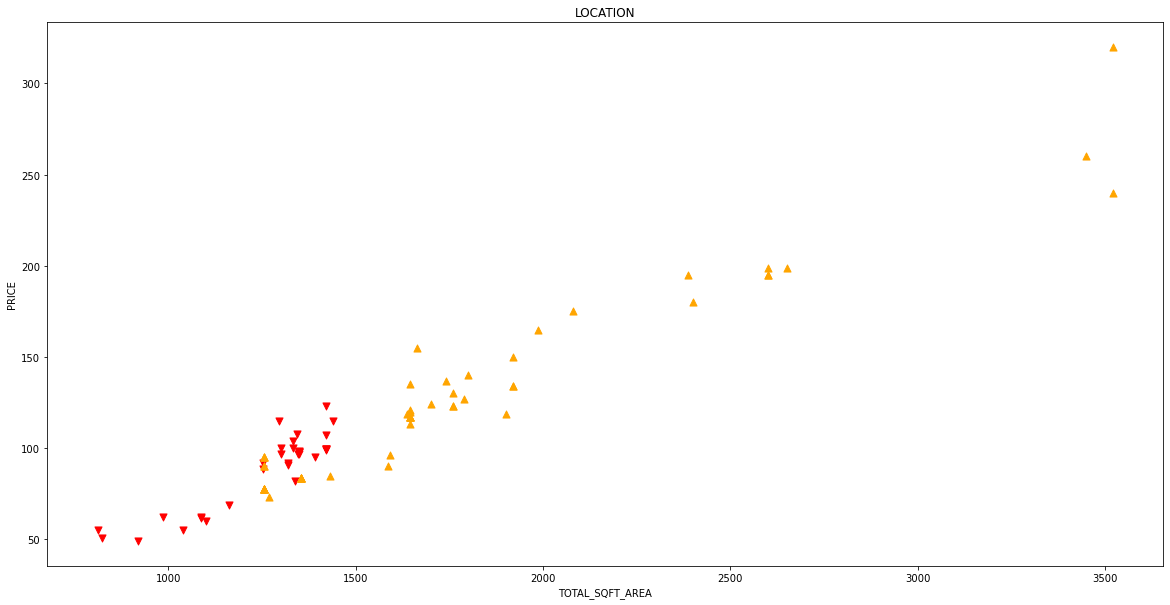

In [59]:
def plot_scatter_chart(df,location):
  bhk2=df[(df.location==location)&(df.bhk==2)]
  bhk3=df[(df.location==location)&(df.bhk==3)]

 
  plt.scatter(bhk2.total_sqft,bhk2.price,marker="v",color="red",label="2 BHK",s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker="^",color="orange",label="3 BHK",s=50)
  plt.xlabel("TOTAL_SQFT_AREA")
  plt.ylabel("PRICE")
  plt.title("LOCATION")

plot_scatter_chart(df7,"Hebbal")

In [44]:
 def remove_bhk_outliers(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby("location"):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby("bhk"):
      bhk_stats[bhk]={
          "mean":np.mean(bhk_df.cost_per_sqft),
          "std":np.std(bhk_df.cost_per_sqft),
          "count":bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby("bhk"):
      stats=bhk_stats.get(bhk-1)
      if stats and stats["count"]>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.cost_per_sqft<(stats["mean"])].index.values)
  return df.drop(exclude_indices,axis="index")

In [45]:
df8=remove_bhk_outliers(df7)
df8.shape

(6850, 7)

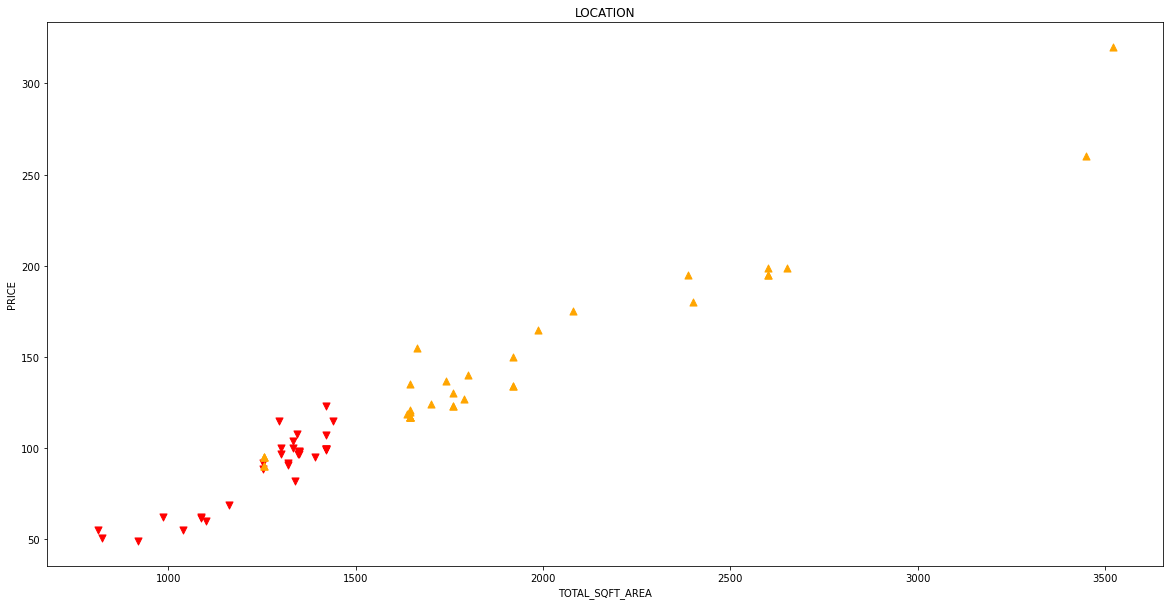

In [60]:
plot_scatter_chart(df8,"Hebbal")

Text(0, 0.5, 'COUNT')

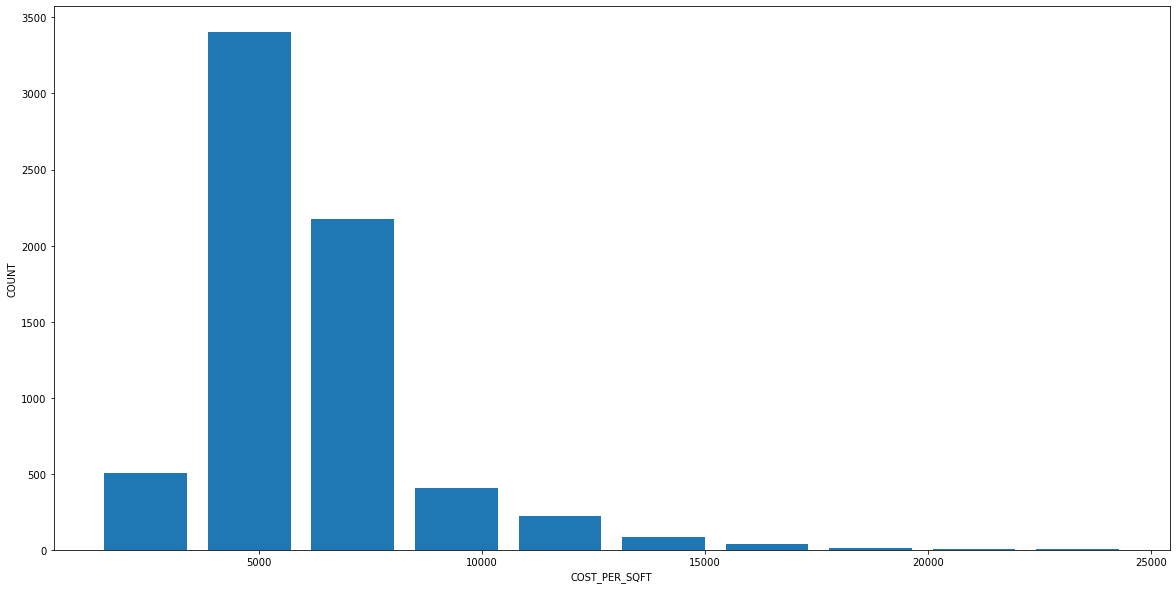

In [47]:
import matplotlib
plt.hist(df8.cost_per_sqft,rwidth=0.8)
plt.xlabel("COST_PER_SQFT")
plt.ylabel("COUNT")

In [48]:
df8.bath.unique()

array([ 2.,  3.,  4.,  8.,  5.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [49]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  cost_per_sqft
4828  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10    4000.000000
7872  other location  10 BHK     12000.0  12.0  525.0   10    4375.000000
7951  other location  16 BHK     10000.0  16.0  550.0   16    5500.000000
8628  other location  11 BHK      6000.0  12.0  150.0   11    2500.000000
8940  other location  13 BHK      5425.0  13.0  275.0   13    5069.124424

Text(0, 0.5, 'COUNT')

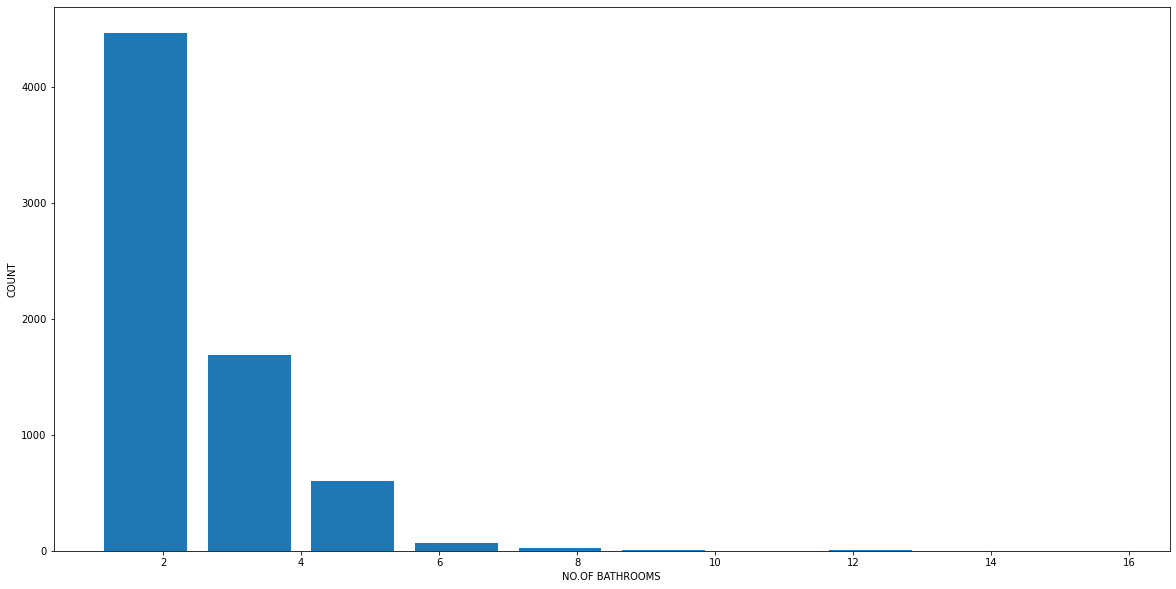

In [50]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("NO.OF BATHROOMS")
plt.ylabel("COUNT")

In [53]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  cost_per_sqft
1457   Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4    3252.032520
4790      Nagasandra  4 Bedroom      7000.0   8.0   450.0    4    6428.571429
6183     Thanisandra      3 BHK      1806.0   6.0   116.0    3    6423.034330
7803  other location      6 BHK     11338.0   9.0  1000.0    6    8819.897689

In [52]:
df9=df8[df8.bath<df8.bhk+2]
df9.shape

(6777, 7)

In [55]:
df10=df9.drop(["size","cost_per_sqft"],axis="columns")
df10.head()

location  total_sqft  bath  price  bhk
1   Devarachikkanahalli      1250.0   2.0   40.0    2
2   Devarachikkanahalli      1200.0   2.0   83.0    2
3   Devarachikkanahalli      1170.0   2.0   40.0    2
4   Devarachikkanahalli      1425.0   2.0   65.0    3
5   Devarachikkanahalli       947.0   2.0   43.0    2

In [56]:
dummies=pd.get_dummies(df10.location)
dummies.head()

Devarachikkanahalli  1st Block Jayanagar  1st Phase JP Nagar  \
1                     1                    0                   0   
2                     1                    0                   0   
3                     1                    0                   0   
4                     1                    0                   0   
5                     1                    0                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
1                          0                     0                     0   
2                          0                     0                     0   
3                          0                     0                     0   
4                          0                     0                     0   
5                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  7th Phase JP Nagar  \
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   
5                   0                   0                   0   

   8th Phase JP Nagar  ...  Vishveshwarya Layout  Vishwapriya Layout  \
1                   0  ...                     0                   0   
2                   0  ...                     0                   0   
3                   0  ...                     0                   0   
4                   0  ...                     0                   0   
5                   0  ...                     0                   0   

   Vittasandra  Whitefield  Yelachenahalli  Yelahanka  Yelahanka New Town  \
1            0           0               0          0                   0   
2            0           0               0          0                   0   
3            0           0               0          0                   0   
4            0           0               0          0                   0   
5            0           0               0          0                   0   

   Yelenahalli  Yeshwanthpur  other location  
1            0             0               0  
2            0             0               0  
3            0             0               0  
4            0             0               0  
5            0             0               0  

[5 rows x 242 columns]

In [58]:
df11=pd.concat([df10,dummies.drop("other location",axis="columns")],axis="columns")
df11.head()

location  total_sqft  bath  price  bhk   Devarachikkanahalli  \
1   Devarachikkanahalli      1250.0   2.0   40.0    2                     1   
2   Devarachikkanahalli      1200.0   2.0   83.0    2                     1   
3   Devarachikkanahalli      1170.0   2.0   40.0    2                     1   
4   Devarachikkanahalli      1425.0   2.0   65.0    3                     1   
5   Devarachikkanahalli       947.0   2.0   43.0    2                     1   

   1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
1                    0                   0                          0   
2                    0                   0                          0   
3                    0                   0                          0   
4                    0                   0                          0   
5                    0                   0                          0   

   2nd Stage Nagarbhavi  ...  Vijayanagar  Vishveshwarya Layout  \
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   
5                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   
5                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  
5                   0            0             0  

[5 rows x 246 columns]

In [61]:
df12=df11.drop("location",axis="columns")
df12.head()

total_sqft  bath  price  bhk   Devarachikkanahalli  1st Block Jayanagar  \
1      1250.0   2.0   40.0    2                     1                    0   
2      1200.0   2.0   83.0    2                     1                    0   
3      1170.0   2.0   40.0    2                     1                    0   
4      1425.0   2.0   65.0    3                     1                    0   
5       947.0   2.0   43.0    2                     1                    0   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   
5                   0                          0                     0   

   5th Block Hbr Layout  ...  Vijayanagar  Vishveshwarya Layout  \
1                     0  ...            0                     0   
2                     0  ...            0                     0   
3                     0  ...            0                     0   
4                     0  ...            0                     0   
5                     0  ...            0                     0   

   Vishwapriya Layout  Vittasandra  Whitefield  Yelachenahalli  Yelahanka  \
1                   0            0           0               0          0   
2                   0            0           0               0          0   
3                   0            0           0               0          0   
4                   0            0           0               0          0   
5                   0            0           0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  
1                   0            0             0  
2                   0            0             0  
3                   0            0             0  
4                   0            0             0  
5                   0            0             0  

[5 rows x 245 columns]

In [62]:
df12.shape

(6777, 245)

In [63]:
x=df12.drop("price",axis="columns")
x.head()

total_sqft  bath  bhk   Devarachikkanahalli  1st Block Jayanagar  \
1      1250.0   2.0    2                     1                    0   
2      1200.0   2.0    2                     1                    0   
3      1170.0   2.0    2                     1                    0   
4      1425.0   2.0    3                     1                    0   
5       947.0   2.0    2                     1                    0   

   1st Phase JP Nagar  2nd Phase Judicial Layout  2nd Stage Nagarbhavi  \
1                   0                          0                     0   
2                   0                          0                     0   
3                   0                          0                     0   
4                   0                          0                     0   
5                   0                          0                     0   

   5th Block Hbr Layout  5th Phase JP Nagar  ...  Vijayanagar  \
1                     0                   0  ...            0   
2                     0                   0  ...            0   
3                     0                   0  ...            0   
4                     0                   0  ...            0   
5                     0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
1                     0                   0            0           0   
2                     0                   0            0           0   
3                     0                   0            0           0   
4                     0                   0            0           0   
5                     0                   0            0           0   

   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  Yeshwanthpur  
1               0          0                   0            0             0  
2               0          0                   0            0             0  
3               0          0                   0            0             0  
4               0          0                   0            0             0  
5               0          0                   0            0             0  

[5 rows x 244 columns]

In [64]:
y=df12.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8458996635056593

In [67]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.80646867, 0.82256609, 0.86471063, 0.89609635, 0.83651196])